In [1]:
import numpy as np
import utils

cifar10_dir = "./data/cifar-10-batches"
X_train, y_train, X_test, y_test = utils.load_cifar10(cifar10_dir, normalize=True)
print("训练数据形状", X_train.shape)
print("训练标签形状:", y_train.shape)
print("测试数据形状:", X_test.shape)
print("测试标签形状:", y_test.shape)

训练数据形状 (50000, 3072)
训练标签形状: (50000,)
测试数据形状: (10000, 3072)
测试标签形状: (10000,)


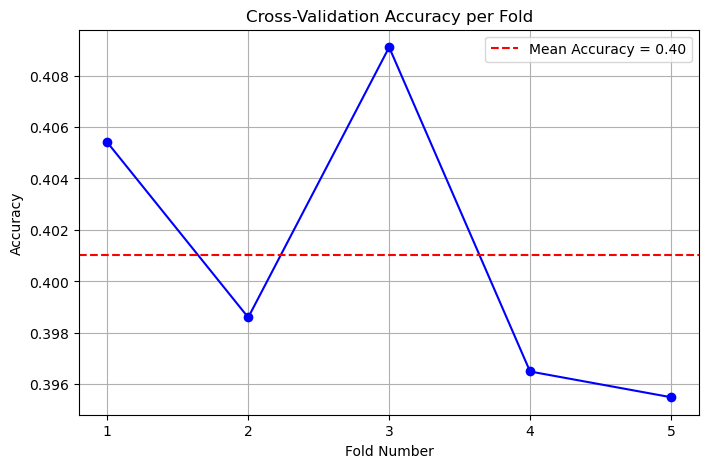

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# PCA降维
pca = PCA(n_components=32)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

# 拟合KNN
knn = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
scores = cross_val_score(knn, X_train_reduced, y_train, cv=5, scoring='accuracy')
    
# 交叉验证正确率可视化
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-', color='b')
plt.axhline(y=np.mean(scores), color='r', linestyle='--', label=f"Mean Accuracy = {np.mean(scores):.2f}")
plt.title("Cross-Validation Accuracy per Fold")
plt.xlabel("Fold Number")
plt.ylabel("Accuracy")
plt.xticks(range(1, len(scores) + 1))
plt.legend()
plt.grid(True)
plt.show()
knn.fit(X_train_reduced, y_train)
y_pred = knn.predict(X_test_reduced)

In [3]:
utils.get_test_scores(y_test, y_pred)

在测试集上的准确率(Accuracy): 41.24%
在测试集上的精确率(Precision): 45.03%
在测试集上的召回率(Recall): 41.24%


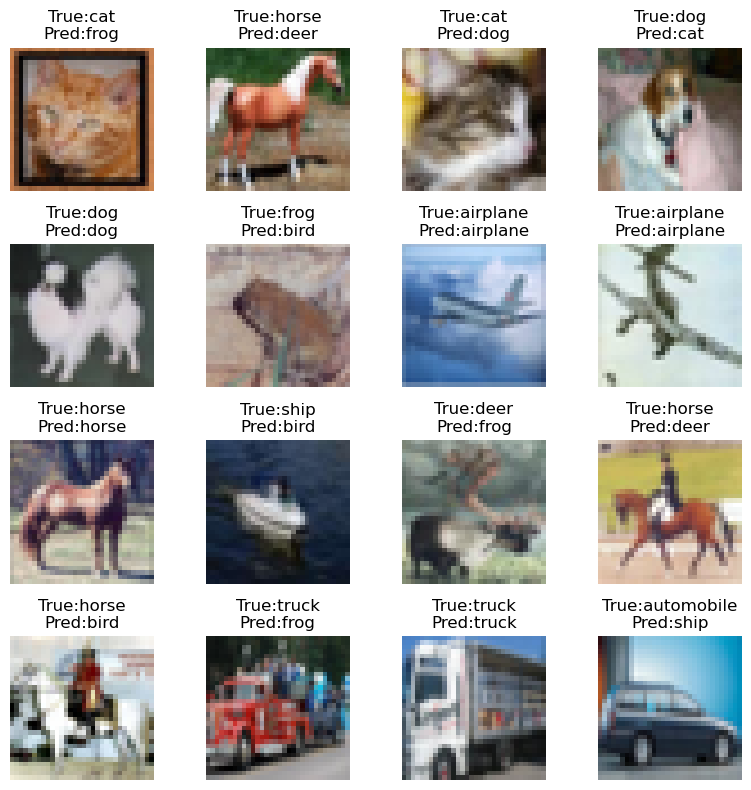

In [4]:
utils.show_predict_res(X_test, y_test, y_pred)

分类报告:
              precision    recall  f1-score   support

           0       0.43      0.59      0.49      1000
           1       0.60      0.41      0.48      1000
           2       0.27      0.41      0.33      1000
           3       0.35      0.22      0.27      1000
           4       0.30      0.43      0.35      1000
           5       0.49      0.28      0.36      1000
           6       0.35      0.52      0.42      1000
           7       0.59      0.34      0.43      1000
           8       0.50      0.61      0.55      1000
           9       0.63      0.32      0.42      1000

    accuracy                           0.41     10000
   macro avg       0.45      0.41      0.41     10000
weighted avg       0.45      0.41      0.41     10000



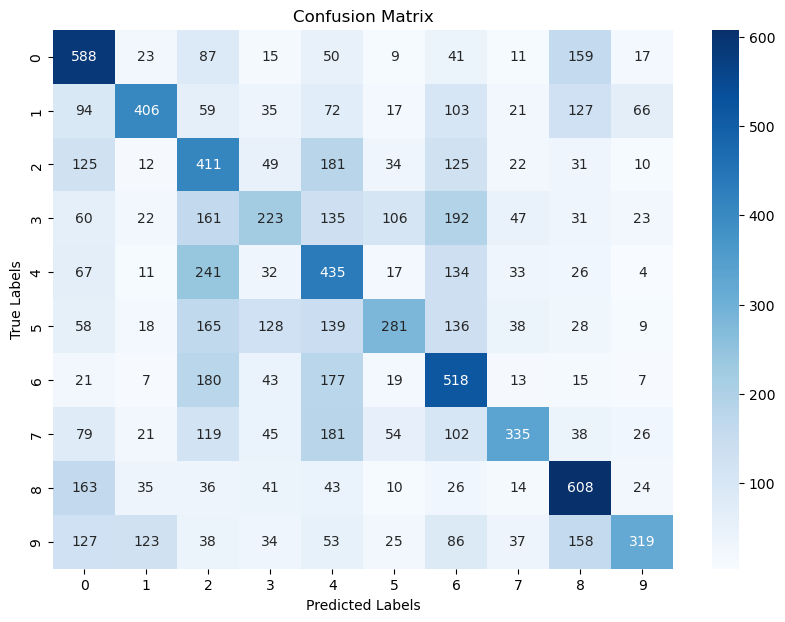

In [5]:
utils.get_report_and_cm(y_test, y_pred)